In [ ]:
## importing the needed tools and libraries

In [11]:
import numpy as np
import torch 
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms 
from torch import nn, optim

In [ ]:
## define tansformation we want before feeding it onto the pipeline 

In [14]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,)),
                                ])

In [ ]:
## now we can download, shuffle and transform all the data needed 

In [15]:
trainset = datasets.MNIST(root='./data', download=True,
train =True, transform=transform)

valset = datasets.MNIST(root='./data', download=True,
train =False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64,
shuffle=True)


100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


180.4%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


In [ ]:
## now do some exploratory data analysis on the dataset to get some insight 

In [16]:
detailer = iter(trainloader)
images, labels = detailer.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
## we can now display our data to have a feel of what we are doing 

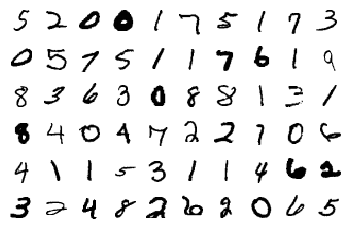

In [18]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


In [ ]:
#build the neural network

In [21]:
input_size= 784
hidden_sizes= [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [25]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [ ]:
#adjust the weights

In [26]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018]])


In [ ]:
## this is where we go over and start properly train the model set as we all know, our neural network works 
## by iterating over training sets and updating weights so let us get to business 

In [36]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6599938153172098
Epoch 1 - Training loss: 0.28526560051132366
Epoch 2 - Training loss: 0.22311289158901934
Epoch 3 - Training loss: 0.18088100900226184
Epoch 4 - Training loss: 0.1536185078477777
Epoch 5 - Training loss: 0.132697145927197
Epoch 6 - Training loss: 0.1168408304728917
Epoch 7 - Training loss: 0.10390075603559581
Epoch 8 - Training loss: 0.09438945124370617
Epoch 9 - Training loss: 0.08549592223689595
Epoch 10 - Training loss: 0.0786784148332216
Epoch 11 - Training loss: 0.07150984903984169
Epoch 12 - Training loss: 0.06534647252728372
Epoch 13 - Training loss: 0.059296542056290105
Epoch 14 - Training loss: 0.05544743689520757

Training Time (in minutes) = 10.237574970722198


In [ ]:
##testing and evaluation 

In [41]:
def view_classify(img, ps):
    #Function for viewing an image and it's predicted classes.
    
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


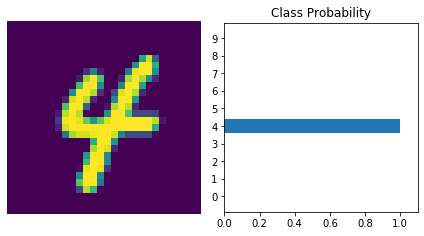

In [42]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
## we should now run a validatuin loop to calculate the total number of correct predictions

In [44]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.974


In [ ]:
#save the model

In [45]:
torch.save(model, './my_mnist_model.pt')

c:\users\ibibo\appdata\local\programs\python\python37\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
c:\users\ibibo\appdata\local\programs\python\python37\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
c:\users\ibibo\appdata\local\programs\python\python37\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
c:\users\ibibo\appdata\local\programs\python\python37\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftm